<a href="https://colab.research.google.com/github/johyunkang/MLwithPythonCookbook/blob/main/14_Tree_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 14 트리와 랜덤 포레스트

## 14.1 결정트리 분류기 훈련하기

과제 : 결정 트리 분류기를 훈련해야함

해결 : 사이킷런의 `DecisionTreeClassifier`를 사용합니다.

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data
y = iris.target

print('x shape:', x.shape, ' , y shape:', y.shape)
print('x sample:', x[:3])
print('y sample:', y[:3])

dt = DecisionTreeClassifier(random_state=0)

model = dt.fit(x, y)

x shape: (150, 4)  , y shape: (150,)
x sample: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
y sample: [0 0 0]


결정 트리 학습기는 노드에서 불순도 (impurity)가 가장 크게 감소하는 결정 규칙을 찾음.

`DecisionTreeClassifier`는 기본적으로 **지니 불순도(Gini impurity)**를 사용함

$G(t) = 1 - \displaystyle \sum_{i=1}^c p_i^2$

- p : 노드 t에서 클래스 c의 샘플 비율

In [5]:
# 새로운 샘플을 생성
observation = [[5, 4, 3, 2]]

# 샘플의 클래스 예측
print('샘플 클래스 예측값:', model.predict(observation))

print('샘플 클래스 예측값(%):', model.predict_proba(observation))

샘플 클래스 예측값: [1]
샘플 클래스 예측값(%): [[0. 1. 0.]]


다른 불순도 지표 사용 방법

In [8]:
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=0)

model_entropy = dt_entropy.fit(x, y)

print('엔트로피 불순도를 이용한 예측:', model_entropy.predict(observation))

엔트로피 불순도를 이용한 예측: [1]


지니 불순도는 클래스가 균등하게 분포되어 있을 때 가장 큼

$G(t) = 1 - 0.5^2 - 0.5^ = 0.5$

엔트로피 불순도 공식은 다음과 같음

$H(t) = - \displaystyle \sum_{i=1}^c p_i log_2 p_i$

엔트로피도 클래스 샘플 비율이 균등할 때 가장 큰 값이 나옴. 다음은 샘플 비율이 균등한 이진 클래스의 경우

$H(t) = -0.5 * log_2(0.5) - 0.5 * log_2(0.5) = 0.5 + 0.5 = 1$

## 14.3 결정 트리 모델 시각화하기

과제 : 결정 트리 학습 알고리즘으로 만든 모델을 시각화해야 합니다.

해결 : 결정 트리 모델을 `DOT` 포맷으로 변환한 후 시각화 합니다.

feature_name: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
class_name: ['setosa' 'versicolor' 'virginica']


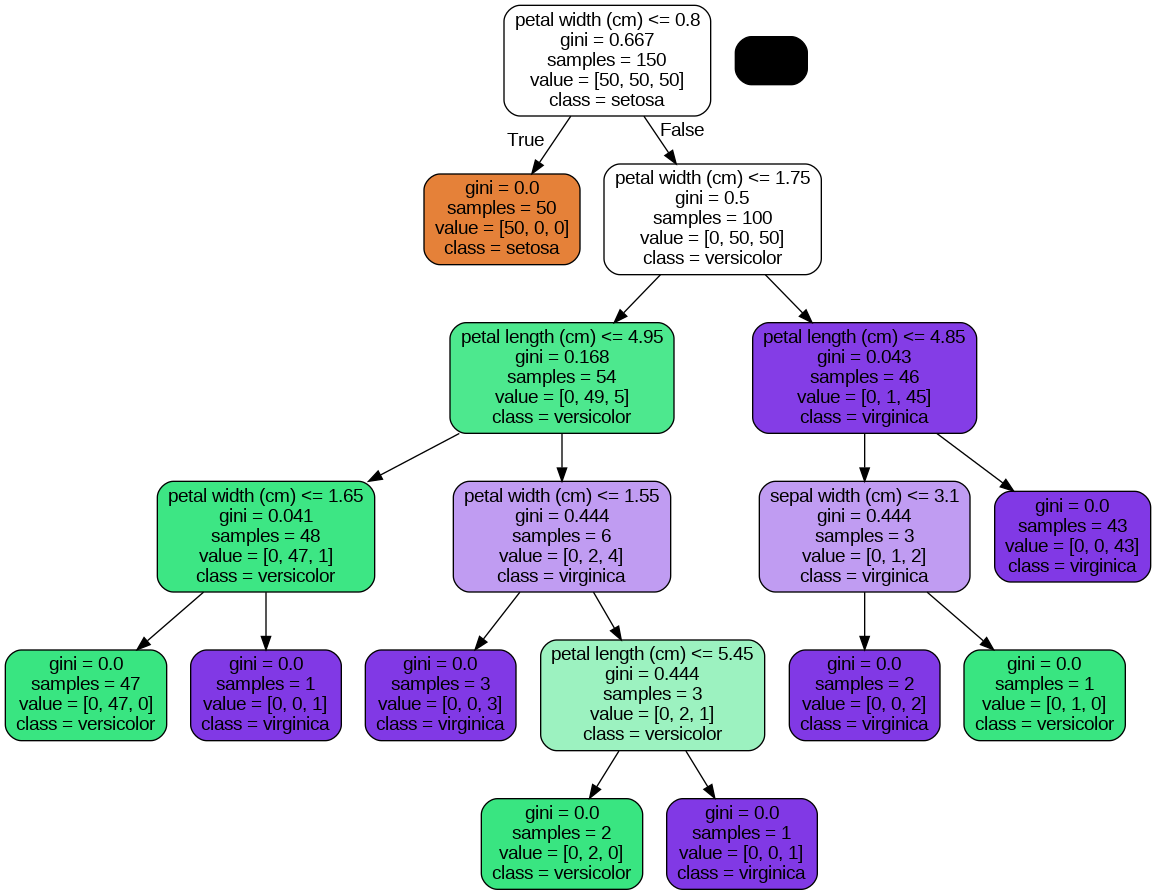

In [17]:
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from IPython.display import Image
from sklearn import tree

iris = load_iris()
x = iris.data
y = iris.target
x_name = iris.feature_names
y_name = iris.target_names
print('feature_name:', x_name)
print('class_name:', y_name)

dt = DecisionTreeClassifier(random_state=0)

model = dt.fit(x, y)

# DOT 데이터 생성 
# filled=True : 클래스에 따라 색이 칠해짐, rounded=True : 모서리 둥글게
dot_data = tree.export_graphviz(dt, out_file=None, feature_names=x_name, class_names=y_name
                                , filled=True, rounded=True)

# 그래프 그리기
graph = pydotplus.graph_from_dot_data(dot_data)

# 그래프 출력
Image(graph.create_png())

In [12]:
# PDF 이미지 생성
graph.write_pdf('dt_iris.pdf')

# PNG 파일 생성
graph.write_png('dt_iris.png')

True

[Text(0.5, 0.9166666666666666, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.5769230769230769, 0.75, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.3076923076923077, 0.5833333333333334, 'petal length (cm) <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.15384615384615385, 0.4166666666666667, 'petal width (cm) <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.46153846153846156, 0.4166666666666667, 'petal width (cm) <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(0.3846153846

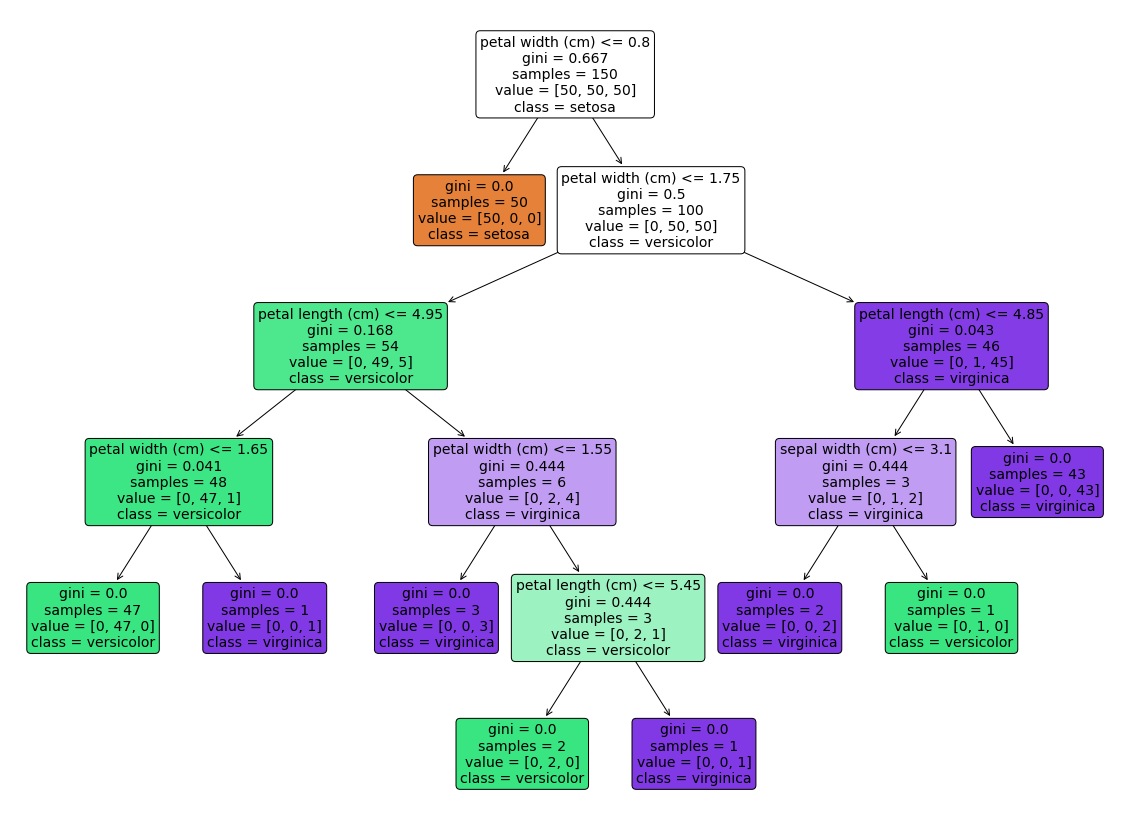

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))

tree.plot_tree(model, filled=True, feature_names=x_name, class_names=y_name
               , rounded=True, fontsize=14)

## 14.5 랜덤 포레스트 회귀 훈련하기

`RandomForestRegressor`

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston

boston = load_boston()
x = boston.data
y = boston.target
x_name = boston.feature_names
# 회귀는 class name이 존재하지 않음
print('feature name:', x_name)

rf = RandomForestRegressor(random_state=0, n_jobs = -1)
model = rf.fit(x, y)

feature name: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


`RandomForestRegressor` 의 중요한 매개변수
- max_features : 각 노드에서 사용할 최대 특성 개수 지정. 기본값은 전체 특성 개수
- bootstrap : 중복을 허용한 샘플링 여부 지정. 기본값은 `True`
- n_estimators : 사용할 결정트리 개수 지정. 기본값은 10

## 14.6 랜덤포레스트에서 중요한 특성 구분하기

과제 : 랜포에서 가장 중요한 특성을 알아야 합니다.

해결 : 특성 중요도를 계산하고 시각화합니다.

importances 원본: [0.00666874 0.00685037 0.50081503 0.48566585]


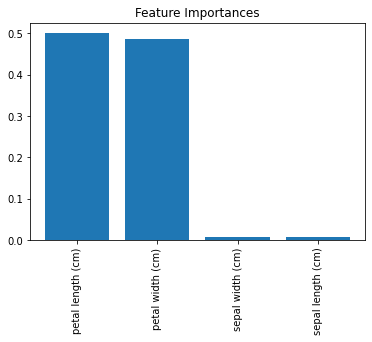

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data
y = iris.target

rfc = RandomForestClassifier(random_state=0, n_jobs = -1)
model = rf.fit(x, y)

# 특성 중요도를 계산
importances = model.feature_importances_
print('importances 원본:', importances)

# 특성 중요도를 내림차순으로 정렬
indices = np.argsort(importances)[::-1]

# 정렬된 특성 중요도에 따라 특성의 이름을 나열
names = [iris.feature_names[i] for i in indices]

plt.figure()
plt.title('Feature Importances')
plt.bar(range(x.shape[1]), importances[indices])

plt.xticks(range(x.shape[1]), names, rotation=90)
plt.show()

In [29]:
print('type:', type(x.shape[1]))
print('type range:', type(range(x.shape[1])))

print('\n x sample:', x.shape[1])
print('x range sample:', range(x.shape[1]))

type: <class 'int'>
type range: <class 'range'>

 x sample: 4
x range sample: range(0, 4)


## 14.7 랜덤포레스트에서 중요한 특성 선택하기

과정 : 랜포에서 특성 선택을 수행해야 합니다.

해결 : 중요한 특성을 구별하고 가장 중요한 특성만 사용하여 모델을 다시 훈련합니다.

In [ ]:
# p.367